In [3]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score, roc_curve

In [4]:
pd.read_csv('winequality-red.csv')

FileNotFoundError: ignored

In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     / 34.6 MB 487 kB/s
     |████████████████████████████████| 10.1 MB 4.1 MB/s 
     |████████████████████████████████| 636 kB 56.1 MB/s 
     |████████████████████████████████| 102 kB 12.3 MB/s 
     |████████████████████████████████| 675 kB 69.4 MB/s 
     |████████████████████████████████| 3.1 MB 43.1 MB/s 
     |████████████████████████████████| 62 kB 836 kB/s 
     |████████████████████████████████| 812 kB 76.1 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.0-py2.py3-none-any.whl size=261225 sha256=65ccc7063f2210becd4fe55a789c9e27e6eb7c2994576c554f92226651c64e4d
  Stored in directory: /tmp/pip-ephem-wheel-cache-z6idsoox/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=fc34ee159394abcd012b20d108eb022f3aa1da16143980b44a6bdc4abd26dfbb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [6]:
df = pd.read_csv('winequality-red.csv')

In [5]:
from pandas_profiling import ProfileReport
ProfileReport(df)   

Output hidden; open in https://colab.research.google.com to view.

In [6]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [7]:
X = df.drop(columns='quality')

In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
y = df['quality']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= .20,random_state= 300)

In [10]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
755,7.8,0.910,0.07,1.90,0.058,22.0,47.0,0.99525,3.51,0.43,10.70
999,6.4,0.690,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.90
1521,6.9,0.480,0.20,1.90,0.082,9.0,23.0,0.99585,3.39,0.43,9.05
24,6.9,0.400,0.14,2.40,0.085,21.0,40.0,0.99680,3.43,0.63,9.70
47,8.7,0.290,0.52,1.60,0.113,12.0,37.0,0.99690,3.25,0.58,9.50
...,...,...,...,...,...,...,...,...,...,...,...
494,6.5,0.390,0.23,8.30,0.051,28.0,91.0,0.99520,3.44,0.55,12.10
1204,7.2,0.360,0.46,2.10,0.074,24.0,44.0,0.99534,3.40,0.85,11.00
346,6.6,0.815,0.02,2.70,0.072,17.0,34.0,0.99550,3.58,0.89,12.30
1596,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.00


In [11]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1166,9.9,0.54,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2
263,7.9,0.37,0.23,1.80,0.077,23.0,49.0,0.99630,3.28,0.67,9.3
34,5.2,0.32,0.25,1.80,0.103,13.0,50.0,0.99570,3.38,0.55,9.2
1148,7.8,0.39,0.42,2.00,0.086,9.0,21.0,0.99526,3.39,0.66,11.6
626,8.8,0.60,0.29,2.20,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1033,7.5,0.57,0.08,2.60,0.089,14.0,27.0,0.99592,3.30,0.59,10.4
1002,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
917,6.8,0.41,0.31,8.80,0.084,26.0,45.0,0.99824,3.38,0.64,10.1
481,9.4,0.30,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.7


In [12]:
dt_model = DecisionTreeClassifier()

In [13]:
dt_model.fit(X_train,y_train)              

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib  inline


[Text(530.6861311280073, 1064.55, 'X[10] <= 10.25\ngini = 0.639\nsamples = 1279\nvalue = [5, 43, 549, 513, 153, 16]'),
 Text(252.91103041307312, 1019.25, 'X[1] <= 0.548\ngini = 0.507\nsamples = 665\nvalue = [3, 22, 417, 208, 14, 1]'),
 Text(167.10871538810716, 973.95, 'X[6] <= 60.5\ngini = 0.551\nsamples = 297\nvalue = [0, 7, 151, 129, 9, 1]'),
 Text(103.21606899682253, 928.6500000000001, 'X[9] <= 0.645\ngini = 0.555\nsamples = 205\nvalue = [0, 5, 82, 109, 8, 1]'),
 Text(65.60236041761236, 883.35, 'X[9] <= 0.465\ngini = 0.552\nsamples = 113\nvalue = [0, 4, 59, 47, 3, 0]'),
 Text(57.497049477984575, 838.05, 'X[9] <= 0.435\ngini = 0.153\nsamples = 12\nvalue = [0, 0, 11, 1, 0, 0]'),
 Text(53.44439400817068, 792.75, 'X[4] <= 0.079\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(49.39173853835679, 747.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(57.497049477984575, 747.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(61.54970494779846, 792

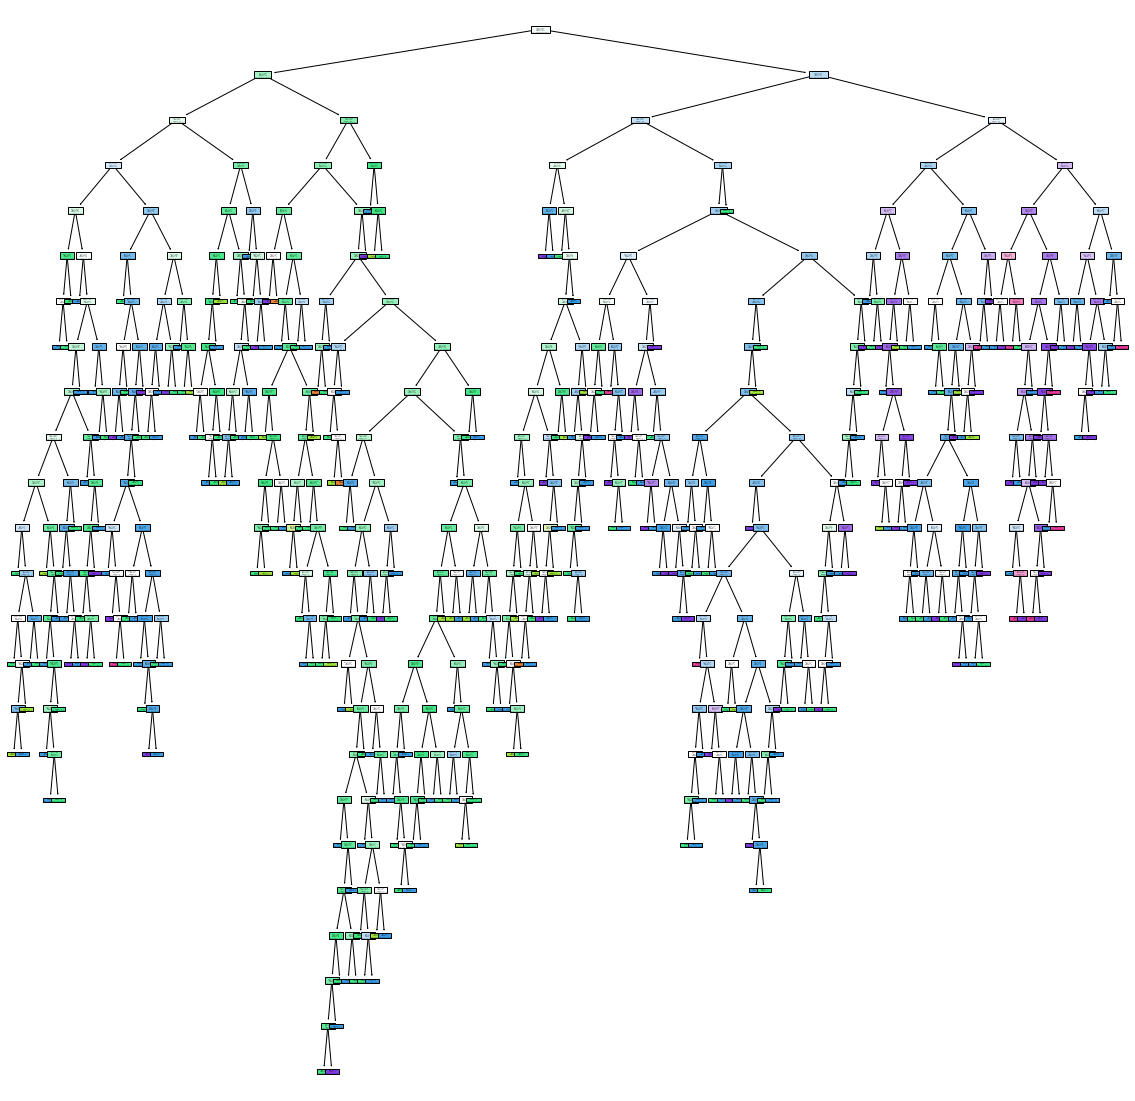

In [21]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [19]:
sklearn.__version__


'0.22.2.post1'

In [15]:
df1  = df.head(30)

In [16]:
X1 = df1.drop(columns='quality')

In [17]:
y1 = df1.quality

In [18]:
dt1_model1 = DecisionTreeClassifier()
dt1_model1.fit(X1,y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
set(y1)  ##we have four classes

{4, 5, 6, 7}

[Text(697.5, 996.6, 'citric acid <= 0.42\ngini = 0.471\nsamples = 30\nvalue = [1, 21, 5, 3]\nclass = 5'),
 Text(465.0, 815.4000000000001, 'total sulfur dioxide <= 22.0\ngini = 0.334\nsamples = 26\nvalue = [1, 21, 2, 2]\nclass = 5'),
 Text(279.0, 634.2, 'free sulfur dioxide <= 8.5\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2]\nclass = 7'),
 Text(186.0, 453.0, 'volatile acidity <= 0.527\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]\nclass = 5'),
 Text(93.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = 5'),
 Text(279.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = 6'),
 Text(372.0, 453.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = 7'),
 Text(651.0, 634.2, 'alcohol <= 9.05\ngini = 0.169\nsamples = 22\nvalue = [1, 20, 1, 0]\nclass = 5'),
 Text(558.0, 453.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = 4'),
 Text(744.0, 453.0, 'volatile acidity <= 0.415\ngini = 0.091\nsamples = 21\nvalue = [0, 20, 1, 0]

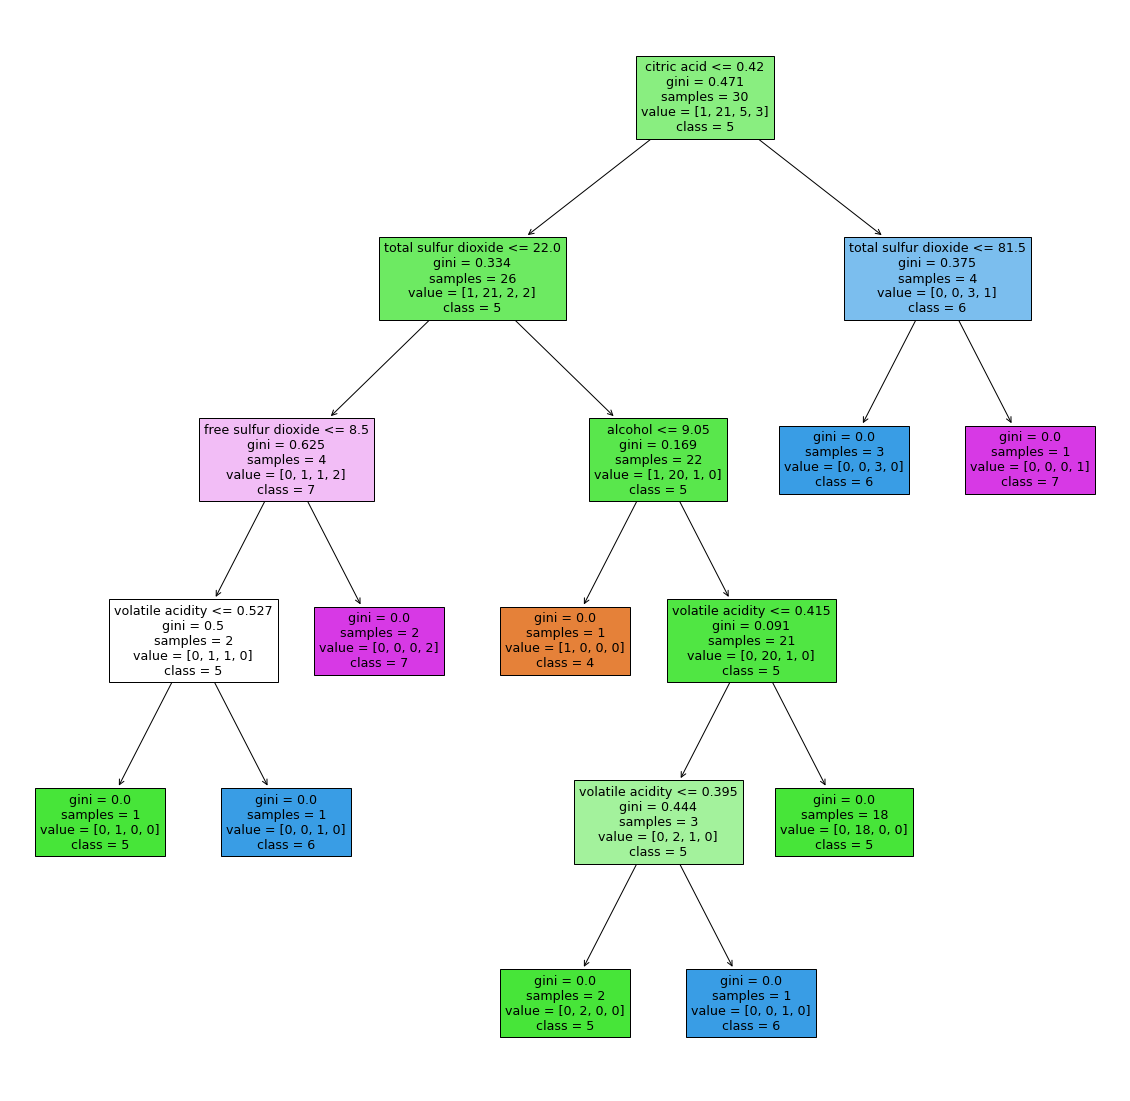

In [20]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt1_model1,filled=True,class_names=[str(i) for i in set(y1)],feature_names=X1.columns)

In [31]:
plt.save(dt1_model1)

AttributeError: ignored

In [32]:
  dt1_model1.predict(X1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6])

In [21]:
dt1_model1.score(X1,y1)

1.0

In [22]:
dt1_model1.score(X_test,y_test)

0.403125

In [23]:
path = dt1_model1.cost_complexity_pruning_path(X1,y1)

In [24]:
ccp_alpha = path['ccp_alphas']

In [25]:
train_score = dt1_model1.score(X1,y1)

In [26]:
dt_modl = []
for ccp in ccp_alpha:
  dt_md =   DecisionTreeClassifier(ccp_alpha=ccp)
  dt_md.fit(X1,y1)
  dt_modl.append(dt_md)

In [27]:
dt_modl

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.03174603174603176, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=None,
                        splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.03333333333333333, class_weight=None,
                  

In [28]:
len(dt_modl) ##8 models

8

In [29]:
train_score8 = [i.score(X1,y1) for i in dt_modl]

In [30]:
test_score8 = [i.score(X_test,y_test) for i in dt_modl]

In [31]:
test_score8, train_score8

([0.403125, 0.375, 0.375, 0.371875, 0.35625, 0.359375, 0.4125, 0.4125],
 [1.0,
  0.9666666666666667,
  0.9333333333333333,
  0.9,
  0.8666666666666667,
  0.8333333333333334,
  0.8,
  0.7])

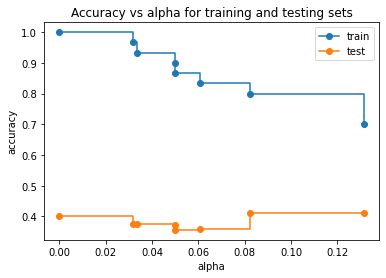

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score8, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score8, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()      #####remark: If u increase the number of smaples u ll get closer from train and test

# Now build a new model with the right ccp

In [33]:
dt_model_new = DecisionTreeClassifier(random_state=0,ccp_alpha=.014)
dt_model_new.fit(X1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(697.5, 996.6, 'X[2] <= 0.42\ngini = 0.471\nsamples = 30\nvalue = [1, 21, 5, 3]'),
 Text(465.0, 815.4000000000001, 'X[6] <= 22.0\ngini = 0.334\nsamples = 26\nvalue = [1, 21, 2, 2]'),
 Text(279.0, 634.2, 'X[5] <= 8.5\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2]'),
 Text(186.0, 453.0, 'X[7] <= 0.996\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]'),
 Text(93.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(279.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(372.0, 453.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(651.0, 634.2, 'X[5] <= 7.5\ngini = 0.169\nsamples = 22\nvalue = [1, 20, 1, 0]'),
 Text(558.0, 453.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(744.0, 453.0, 'X[1] <= 0.415\ngini = 0.091\nsamples = 21\nvalue = [0, 20, 1, 0]'),
 Text(651.0, 271.79999999999995, 'X[4] <= 0.084\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0]'),
 Text(558.0, 90.59999999999991, 'gini = 0.0\nsamples = 2\nval

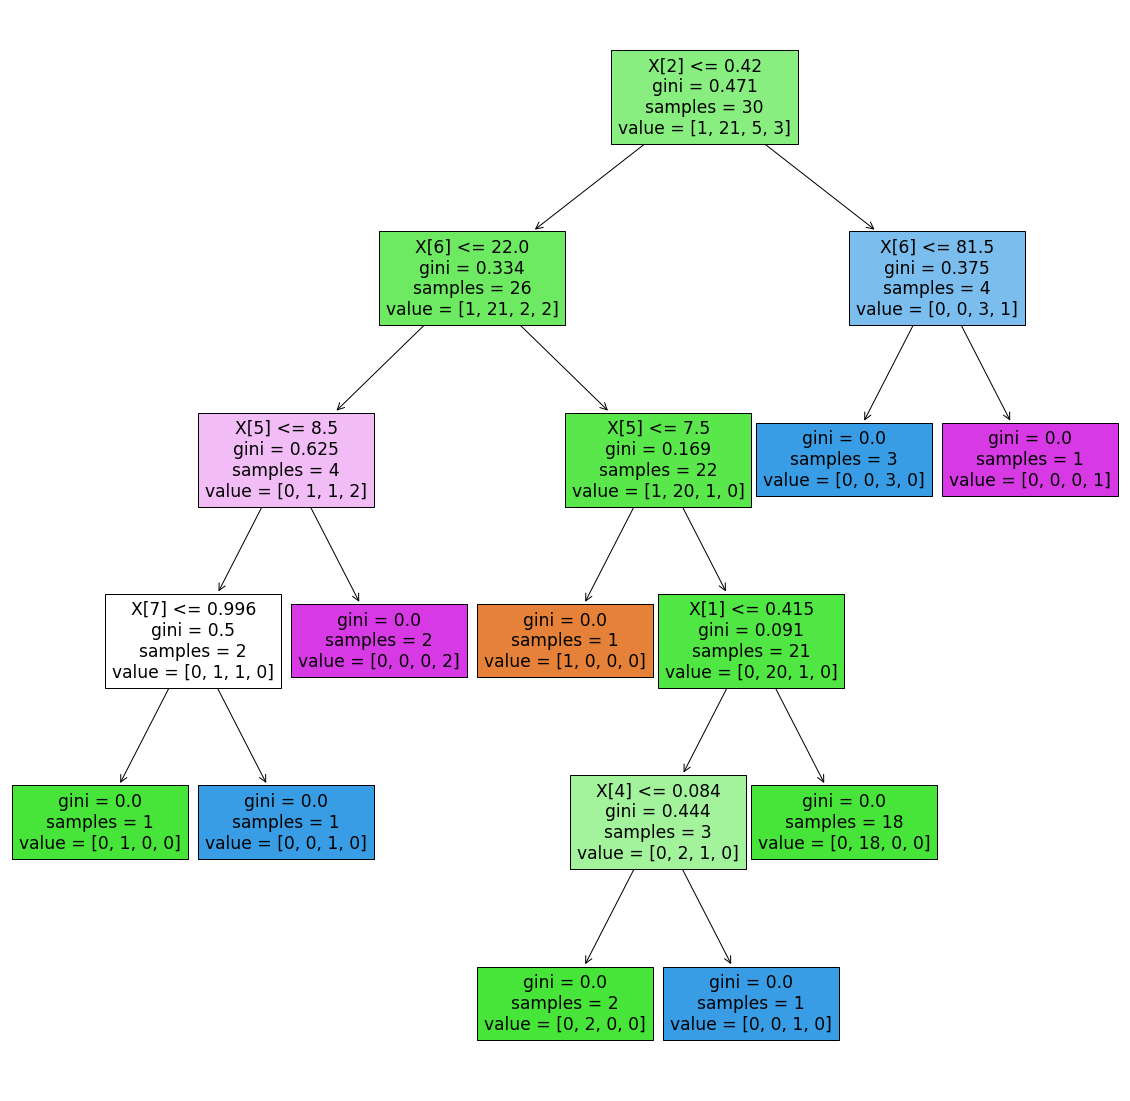

In [34]:
plt.figure(figsize =(20,20))
tree.plot_tree(dt_model_new,filled=True)

Now increase the number of features

In [35]:
df1  = df.head(200)

In [36]:
X1 = df1.drop(columns='quality')
y1 = df1['quality']

In [37]:
dt_model_new.score(X1,y1)

0.6

In [38]:
dt_model_new.score(X_test,y_test)

0.3875

Now we get a better model such that the scores are close!

In [39]:
grid_param = {"criterion": ['gini','entropy'],
              "splitter": ['best','random'],
              "max_depth" : range(2,40,1),
              "min_samples_split" : range(2,40,1),
              "min_samples_leaf" : range(1,40,1)

              
              }

In [40]:
grid_ccp = GridSearchCV(estimator=dt_model_new,param_grid=grid_param, cv=5,n_jobs=-1)

In [41]:
grid_ccp.fit(X1,y1)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [42]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 13,
 'min_samples_split': 2,
 'splitter': 'best'}

In [44]:
dt_opt = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=13,min_samples_split=2,splitter='best')

In [45]:
dt_opt.fit(X1,y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
dt_opt.score(X1,y1)

0.73

In [47]:
dt_opt.score(X_test,y_test)

0.540625

In [ ]:
dt_model.predict(X_test)

array([6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 4, 5, 6, 7,
       6, 5, 6, 6, 5, 5, 7, 5, 6, 7, 6, 5, 7, 5, 5, 4, 5, 5, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6, 7, 5, 6, 5, 5,
       7, 6, 4, 6, 5, 6, 6, 7, 6, 5, 8, 5, 6, 5, 5, 6, 6, 6, 7, 7, 5, 5,
       6, 4, 6, 5, 5, 7, 5, 4, 7, 6, 5, 5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 7,
       6, 5, 5, 6, 5, 6, 4, 6, 6, 5, 6, 5, 6, 6, 6, 7, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 7, 7, 5,
       6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 7,
       5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 5, 5, 6, 7, 5, 5, 7, 5, 7, 5, 7,
       5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 7, 5, 5, 5, 5, 5, 7, 5, 7, 6, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5,
       6, 7, 6, 5, 6, 6, 5, 6, 5, 6, 7, 5, 5, 6, 5, 7, 7, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 5,

In [ ]:
dt_model.score(X_test,y_test)

0.596875

In [ ]:
dt_ent  = DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_ent.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_ent.score(X_test,y_test)

0.6

In [ ]:
outfile = open('dt_ent_meta.dot','w')
tree.export_graphviz(dt_ent,out_file = outfile,feature_names=X.columns)

In [ ]:
outfile  

<_io.TextIOWrapper name='dt_ent_meta.dot' mode='w' encoding='UTF-8'>

In [ ]:
dir()

['DecisionTreeClassifier',
 'GridSearchCV',
 'In',
 'Out',
 'ProfileReport',
 'X',
 'X_test',
 'X_train',
 '_',
 '_12',
 '_14',
 '_17',
 '_18',
 '_19',
 '_23',
 '_24',
 '_27',
 '_4',
 '_7',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'accuracy_score',
 'confusion_matrix',
 'df',
 'dt_ent',
 'dt_model',
 'exit',
 'get_ipython',
 'np',
 'outfile',
 'pd',
 'quit',
 'roc_auc_score',
 'roc_curve',
 'train_test_split',
 'tree',
 'y',
 'y_test',
 'y_train']